<a href="https://colab.research.google.com/github/Fabio-Morganti/Progetto-Python-Data-Science/blob/main/Progetto_Python_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.impute import SimpleImputer

In [ ]:
np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_columns', None)  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Progetto Python/US_Accidents_June20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.isna().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [ ]:
df.shape

(3513617, 49)

In [ ]:
df['Severity'].nunique()

4

In [ ]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [ ]:
df.nunique()

ID                       3513617
Source                         3
TMC                           21
Severity                       4
Start_Time               3200042
End_Time                 3246120
Start_Lat                1124695
Start_Lng                1113407
End_Lat                   375074
End_Lng                   383569
Distance(mi)               13476
Description              1780092
Number                     40365
Street                    176262
Side                           3
City                       11895
County                      1724
State                         49
Zipcode                   418780
Country                        1
Timezone                       4
Airport_Code                2001
Weather_Timestamp         546086
Temperature(F)               831
Wind_Chill(F)                974
Humidity(%)                  100
Pressure(in)                1022
Visibility(mi)                85
Wind_Direction                24
Wind_Speed(mph)              160
Precipitat

In [ ]:
df.drop(['Country', 'Turning_Loop', 'End_Lat', 'End_Lng', 'Number', 'Precipitation(in)'], axis=1, inplace=True)

In [ ]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

Roundabout       Visibility(mi)     0.000043
Visibility(mi)   Roundabout         0.000043
Station          Wind_Speed(mph)    0.000071
Wind_Speed(mph)  Station            0.000071
Roundabout       Bump               0.000095
                                      ...   
Railway          Railway            1.000000
Roundabout       Roundabout         1.000000
Station          Station            1.000000
Wind_Speed(mph)  Wind_Speed(mph)    1.000000
Traffic_Signal   Traffic_Signal     1.000000
Length: 529, dtype: float64


In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [ ]:
so[so>0.8]

Temperature(F)   Wind_Chill(F)      0.994274
Wind_Chill(F)    Temperature(F)     0.994274
TMC              TMC                1.000000
Amenity          Amenity            1.000000
Stop             Stop               1.000000
Severity         Severity           1.000000
Start_Lat        Start_Lat          1.000000
Start_Lng        Start_Lng          1.000000
Distance(mi)     Distance(mi)       1.000000
Temperature(F)   Temperature(F)     1.000000
Wind_Chill(F)    Wind_Chill(F)      1.000000
Humidity(%)      Humidity(%)        1.000000
Pressure(in)     Pressure(in)       1.000000
Traffic_Calming  Traffic_Calming    1.000000
Visibility(mi)   Visibility(mi)     1.000000
Bump             Bump               1.000000
Crossing         Crossing           1.000000
Give_Way         Give_Way           1.000000
Junction         Junction           1.000000
No_Exit          No_Exit            1.000000
Railway          Railway            1.000000
Roundabout       Roundabout         1.000000
Station   

In [ ]:
df.drop('Wind_Chill(F)', axis=1, inplace=True)

In [ ]:
df.drop('Description', axis=1, inplace=True)

In [ ]:
df.shape

(3513617, 41)

In [ ]:
df.isna().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Weather_Condition          76138
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit   

In [ ]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit   

In [ ]:
df_object_int = df.select_dtypes(include=['int64', 'object', 'bool'])

In [ ]:
df_object_int.dtypes

ID                       object
Source                   object
Severity                  int64
Start_Time               object
End_Time                 object
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Wind_Direction           object
Weather_Condition        object
Amenity                    bool
Bump                       bool
Crossing                   bool
Give_Way                   bool
Junction                   bool
No_Exit                    bool
Railway                    bool
Roundabout                 bool
Station                    bool
Stop                       bool
Traffic_Calming            bool
Traffic_Signal             bool
Sunrise_Sunset           object
Civil_Twilight           object
Nautical_Twilight        object
Astronom

In [ ]:
df_float = df.select_dtypes(include='float64')
df_float.dtypes

TMC                float64
Start_Lat          float64
Start_Lng          float64
Distance(mi)       float64
Temperature(F)     float64
Humidity(%)        float64
Pressure(in)       float64
Visibility(mi)     float64
Wind_Speed(mph)    float64
dtype: object

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=2)
#imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=df_object_int.mode()[0], verbose=2)

In [ ]:
for column in df_object_int.columns:
  df_object_int[column].fillna(df_object_int[column].mode()[0], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
dataframe_float = pd.DataFrame(imp_mean.fit_transform(df_float))

In [ ]:
#dataframe_object_int = pd.DataFrame(imp_most_frequent.fit_transform(df_object_int))

In [ ]:
dataframe_float.columns = df_float.columns
#dataframe_object_int.columns = df_object_int.columns

In [ ]:
dataframe_nonull = pd.concat([dataframe_float, df_object_int], axis=1, sort=False)

In [ ]:
dataframe_nonull.head()

,TMC,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),ID,Source,Severity,Start_Time,End_Time,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,201.0,39.865147,-84.058723,0.01,36.9,91.0,29.68,10.0,8.219025,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,I-70 E,R,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,201.0,39.928059,-82.831184,0.01,37.9,100.0,29.65,10.0,8.219025,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,Calm,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,201.0,39.063148,-84.032608,0.01,36.0,100.0,29.67,10.0,3.500000,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,State Route 32,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day
3,201.0,39.747753,-84.205582,0.01,35.1,96.0,29.64,9.0,4.600000,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,I-75 S,R,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,201.0,39.627781,-84.188354,0.01,36.0,89.0,29.65,6.0,3.500000,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day


In [ ]:
dataframe_nonull.describe()

,TMC,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Severity
count,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06
mean,2.080226e+02,3.654195e+01,-9.579151e+01,2.816167e-01,6.193512e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,2.339929e+00
std,1.744230e+01,4.883520e+00,1.736877e+01,1.550134e+00,1.844605e+01,2.252879e+01,8.253333e-01,2.854558e+00,4.910592e+00,5.521935e-01
min,2.000000e+02,2.455527e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.010000e+02,3.363784e+01,-1.174418e+02,0.000000e+00,5.000000e+01,4.900000e+01,2.974000e+01,1.000000e+01,5.000000e+00,2.000000e+00
50%,2.010000e+02,3.591687e+01,-9.102601e+01,0.000000e+00,6.300000e+01,6.700000e+01,2.995000e+01,1.000000e+01,8.100000e+00,2.000000e+00
75%,2.080226e+02,4.032217e+01,-8.093299e+01,1.000000e-02,7.570000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.040000e+01,3.000000e+00
max,4.060000e+02,4.900220e+01,-6.711317e+01,3.336300e+02,1.706000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,4.000000e+00


In [ ]:
dataframe_nonull.isna().sum()

TMC                      0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
S

In [ ]:
dataframe_nonull.shape

(3513617, 41)

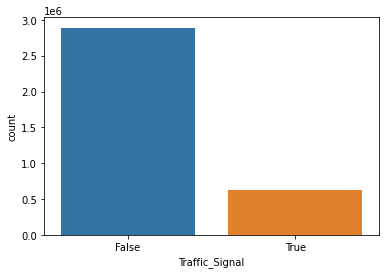

In [ ]:
plt.figure()
sns.countplot(x="Traffic_Signal", data=dataframe_nonull)
plt.savefig('/content/drive/MyDrive/Progetto Python/count_traffic.png')
plt.show()

In [ ]:
df_prova = dataframe_nonull

In [ ]:
df_prova.groupby('Traffic_Signal').count()

,TMC,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),ID,Source,Severity,Start_Time,End_Time,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Traffic_Signal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994,2889994
True,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623


In [ ]:
np.random.seed(42)
remove_n = 2889994-623623
drop_indices = np.random.choice(df_prova.loc[df_prova['Traffic_Signal'] == False].index, remove_n, replace=False)
df_balanced = df_prova.drop(drop_indices)

In [ ]:
df_balanced.shape

(1247246, 41)

In [ ]:
df_balanced.groupby('Traffic_Signal').count()

,TMC,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),ID,Source,Severity,Start_Time,End_Time,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Traffic_Signal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623
True,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623,623623


In [ ]:
df_balanced.head()

,TMC,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),ID,Source,Severity,Start_Time,End_Time,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,201.0,39.063148,-84.032608,0.01,36.0,100.0,29.67,10.0,3.5,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,State Route 32,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day
4,201.0,39.627781,-84.188354,0.01,36.0,89.0,29.65,6.0,3.5,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day
6,201.0,39.758274,-84.230507,0.00,34.0,100.0,29.66,7.0,3.5,A-7,MapQuest,2,2016-02-08 07:59:35,2016-02-08 08:29:35,N Woodward Ave,R,Dayton,Montgomery,OH,45417-2476,US/Eastern,KDAY,2016-02-08 07:56:00,WSW,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
10,201.0,39.952812,-83.119293,0.01,35.6,93.0,29.64,5.0,5.8,A-11,MapQuest,3,2016-02-08 08:14:42,2016-02-08 08:44:42,Outerbelt S,R,Columbus,Franklin,OH,43228,US/Eastern,KTZR,2016-02-08 07:50:00,WNW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
13,201.0,39.790760,-84.241547,0.01,36.0,89.0,29.65,10.0,5.8,A-14,MapQuest,2,2016-02-08 08:37:07,2016-02-08 09:07:07,Salem Ave,L,Dayton,Montgomery,OH,45406-2708,US/Eastern,KDAY,2016-02-08 08:56:00,NW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day


In [ ]:
df_balanced.drop(['ID', 'Zipcode', 'Airport_Code', 'TMC', 'Distance(mi)'], axis=1, inplace=True)

In [ ]:
df_balanced['Temperature(C)'] = df_balanced['Temperature(F)']-32
df_balanced['Temperature(C)'].head()

2     4.0
4     4.0
6     2.0
10    3.6
13    4.0
Name: Temperature(C), dtype: float64

In [ ]:
df_balanced.drop('Temperature(F)', axis=1, inplace=True)

In [ ]:
df_balanced['Start_Time'] = pd.to_datetime(df_balanced['Start_Time'])
df_balanced['End_Time'] = pd.to_datetime(df_balanced['End_Time'])
df_balanced.dtypes

Start_Lat                       float64
Start_Lng                       float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Speed(mph)                 float64
Source                           object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Street                           object
Side                             object
City                             object
County                           object
State                            object
Timezone                         object
Weather_Timestamp                object
Wind_Direction                   object
Weather_Condition                object
Amenity                            bool
Bump                               bool
Crossing                           bool
Give_Way                           bool
Junction                           bool
No_Exit                            bool


In [ ]:
df_balanced['Durations'] = (df_balanced['End_Time'] - df_balanced['Start_Time'])

In [ ]:
df_balanced['Durations'] = df_balanced['Durations'].apply(lambda x: (x.total_seconds()/60))

In [ ]:
df_balanced.drop('End_Time', axis=1, inplace=True)

In [ ]:
df_balanced['Start_Date'] = [d.date() for d in df_balanced['Start_Time']]
df_balanced['Start_Time'] = [d.time() for d in df_balanced['Start_Time']]


In [ ]:
def crea_orario(tempo):
  if ((tempo.hour >=6) & (tempo.hour <12)):
    return 'Mattina'
  elif ((tempo.hour >=12) & (tempo.hour <19)):
    return 'Pomeriggio'
  elif ((tempo.hour >=19) & (tempo.hour <23)):
    return 'Sera'
  else:
    return 'Notte'

In [ ]:
df_balanced['Orario'] = df_balanced['Start_Time'].apply(lambda x: (crea_orario(x)))

In [ ]:
df_balanced.isna().sum()

Start_Lat                0
Start_Lng                0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
Source                   0
Severity                 0
Start_Time               0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Timezone                 0
Weather_Timestamp        0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Temperature(C)           0
Durations                0
Start_Date               0
O

In [ ]:
df_balanced['Start_Date'] = pd.to_datetime(df_balanced['Start_Date'])

In [ ]:
df_balanced['Year'] = df_balanced['Start_Date'].dt.year
df_balanced['Month'] = df_balanced['Start_Date'].dt.month
df_balanced['Day'] = df_balanced['Start_Date'].dt.day
df_balanced['Day_of_week'] = df_balanced['Start_Date'].dt.dayofweek

In [ ]:
def day_of_week(day):
  if day == 0:
    return "Lunedi"
  if day == 1:
    return "Martedi"
  if day == 2:
    return "Mercoledi"
  if day == 3:
    return "Giovedi"
  if day == 4:
    return "Venerdi"
  if day == 5:
    return "Sabato"
  if day == 6:
    return "Domenica"

In [ ]:
def stagione(mese):
  if ((mese == 12) | (mese == 1) | (mese == 2)):
    return 'inverno'
  elif ((mese == 3) | (mese == 4) | (mese == 5)):
    return 'primavera'
  elif ((mese == 6) | (mese == 7) | (mese == 8)):
    return 'estate'
  else:
    return 'autunno'

In [ ]:
df_balanced['Day_of_week'] = df_balanced['Day_of_week'].apply(lambda x: (day_of_week(x)))

In [ ]:
df_balanced['Season'] = df_balanced['Month'].apply(lambda x: (stagione(x)))

In [ ]:
df_balanced.head(100)

,Start_Lat,Start_Lng,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Source,Severity,Start_Time,Street,Side,City,County,State,Timezone,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temperature(C),Durations,Start_Date,Orario,Year,Month,Day,Day_of_week,Season
2,39.063148,-84.032608,100.0,29.67,10.0,3.500000,MapQuest,2,06:49:27,State Route 32,R,Williamsburg,Clermont,OH,US/Eastern,2016-02-08 06:56:00,SW,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
4,39.627781,-84.188354,89.0,29.65,6.0,3.500000,MapQuest,2,07:39:07,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:53:00,SW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
6,39.758274,-84.230507,100.0,29.66,7.0,3.500000,MapQuest,2,07:59:35,N Woodward Ave,R,Dayton,Montgomery,OH,US/Eastern,2016-02-08 07:56:00,WSW,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
10,39.952812,-83.119293,93.0,29.64,5.0,5.800000,MapQuest,3,08:14:42,Outerbelt S,R,Columbus,Franklin,OH,US/Eastern,2016-02-08 07:50:00,WNW,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3.6,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
13,39.790760,-84.241547,89.0,29.65,10.0,5.800000,MapQuest,2,08:37:07,Salem Ave,L,Dayton,Montgomery,OH,US/Eastern,2016-02-08 08:56:00,NW,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,4.0,30.0,2016-02-08,Mattina,2016,2,8,Lunedi,inverno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,39.819809,-84.187103,79.0,30.51,5.0,3.500000,MapQuest,2,08:37:28,Needmore Rd,L,Dayton,Montgomery,OH,US/Eastern,2016-02-18 08:56:00,SE,Haze,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,-1.1,30.0,2016-02-18,Mattina,2016,2,18,Giovedi,inverno
252,39.999187,-83.075813,85.0,30.53,8.0,6.900000,MapQuest,2,08:48:51,Riverside Dr,L,Columbus,Franklin,OH,US/Eastern,2016-02-18 08:53:00,East,Clear,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,-5.0,30.0,2016-02-18,Mattina,2016,2,18,Giovedi,inverno
254,39.917412,-83.014236,80.0,30.50,7.0,8.219025,MapQuest,3,09:00:07,Frank Rd,R,Columbus,Franklin,OH,US/Eastern,2016-02-18 08:50:00,Calm,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,-5.4,30.0,2016-02-18,Mattina,2016,2,18,Giovedi,inverno
255,41.423275,-81.760010,81.0,30.62,10.0,6.900000,MapQuest,2,09:03:24,Cascade Xing,R,Cleveland,Cuyahoga,OH,US/Eastern,2016-02-18 08:51:00,ESE,Clear,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,-16.0,45.0,2016-02-18,Mattina,2016,2,18,Giovedi,inverno


In [ ]:
gruppo = df_balanced.groupby('Orario')['Severity'].count()
gruppo.head()

Orario
Mattina       514197
Notte          90586
Pomeriggio    519458
Sera          123005
Name: Severity, dtype: int64

In [ ]:
df_balanced.to_csv('/content/drive/MyDrive/Progetto Python/dataset_balanced.csv', index=False)